In [1]:
import requests as re
from skimage import io
import matplotlib.pyplot as plt
import geopandas as gpd

## 1. In the cloud(s)

In [2]:
Berkeley_lat = '37.87' 
Berkeley_lon = '-122.26'
date = '2014-05-21'
my_api_key = 'DEMO_KEY'

base_url = 'https://api.nasa.gov/planetary/earth/imagery/'
image_query = base_url+'?lat='+Berkeley_lat+'&lon='+Berkeley_lon+'&date='+date
image_query += '&api_key='+my_api_key
r = re.get(image_query)

def download_file(url, local_filename):
    r = re.get(url, stream=True)
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
    return local_filename
nasa_reply_url = r.json()['url']
download_file(nasa_reply_url,'image.png')
im = io.imread('image.png')

In [3]:
print('The dimensions of the image numpy array are %s for a total size of %d.' % (im.shape, im.size))

The dimensions of the image numpy array are (512, 512, 3) for a total size of 786432.


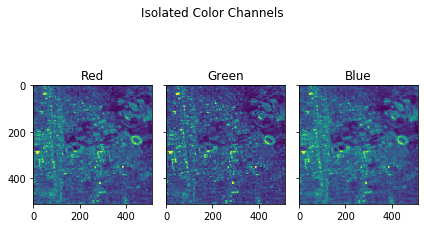

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True)
im1 = ax1.imshow(im[:,:,0])
im2 = ax2.imshow(im[:,:,1])
im3 = ax3.imshow(im[:,:,2])

fig.suptitle('Isolated Color Channels')
ax1.set_title('Red')
ax2.set_title('Green')
ax3.set_title('Blue')
fig.tight_layout()

plt.show()

The red and green channels look very similar, while the blue has significantly higher values on the left side of the image.

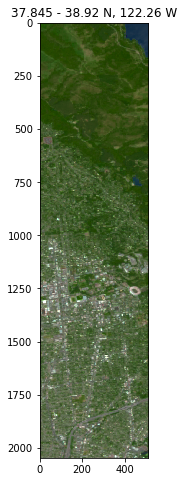

In [5]:
Berkeley_lat_current = str(float(Berkeley_lat) - 0.025)
long_fig = np.empty([0,512,3], dtype = int)

for i in range(4):
    image_query = base_url+'?lat='+Berkeley_lat_current+'&lon='+Berkeley_lon+'&date='+date
    image_query += '&api_key='+my_api_key
    r = re.get(image_query)
    download_file(r.json()['url'], 'image%s.png'%(i))
    temp_fig = io.imread('image%s.png'%(i))
    long_fig = np.concatenate((temp_fig, long_fig), axis = 0)
    Berkeley_lat_current = str(float(Berkeley_lat_current) + 0.025)

plt.figure(figsize = (2,8))
plt.imshow(long_fig)
plt.title('37.845 - 38.92 N, 122.26 W')
plt.show()

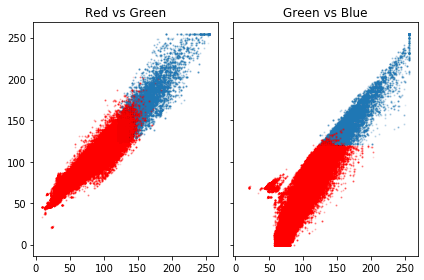

In [6]:
mask = long_fig[(long_fig[:,:,0] > 120) & (long_fig[:,:,1] > 120) & (long_fig[:,:,2] > 120)]
mask2 = long_fig[(long_fig[:,:,0] < 120) | (long_fig[:,:,1] < 120) | (long_fig[:,:,2] < 120)]
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True)

ax1.scatter(mask[:,0].flatten(), mask[:,1].flatten(),alpha=0.1,s=1)
ax1.scatter(mask2[:,0].flatten(), mask2[:,1].flatten(),alpha=0.1,s=1, c='r')
ax2.scatter(mask[:,1].flatten(), mask[:,2].flatten(),alpha=0.1,s=1)
ax2.scatter(mask2[:,1].flatten(), mask2[:,2].flatten(),alpha=0.1,s=1, c='r')

ax1.set_title('Red vs Green')
ax2.set_title('Green vs Blue')

fig.tight_layout()
plt.show()

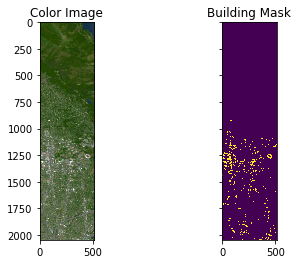

In [7]:
mask = (long_fig[:,:,0] > 120) & (long_fig[:,:,1] > 120) & (long_fig[:,:,2] > 120)

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True)
im1 = ax1.imshow(long_fig)
im2 = ax2.imshow(mask)

ax1.set_title('Color Image')
ax2.set_title('Building Mask')

plt.show()

This mask seems very effective on campus and in downtown berkeley. Buildings in high-foliage areas are not as consistently identified.